<a href="https://colab.research.google.com/github/GadeMounika8/ML_model_building_on_datasets/blob/main/ML_Model_Building_on_Diamond_Dataset_Approach_2_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing all required Libraries



In [3]:
#importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the Diamonds Dataset

In [4]:
# reading the csv file
df = pd.read_csv(r"/content/drive/MyDrive/diamonds.csv")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [5]:
#Top 5 records
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
#gives number of rows and columns
df.shape

(53940, 10)

In [7]:
#displays all the column names
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [8]:
#shows number of rows
df.index

RangeIndex(start=0, stop=53940, step=1)

In [9]:
#rearranging the dataframe
newdf = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table','x', 'y', 'z', 'price']]
newdf.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


#Step-1:
#Identifying the input variables(X) and Target Variables(y)

In [10]:
y = newdf['price']
X = newdf[['carat', 'cut', 'color', 'clarity', 'depth', 'table','x', 'y', 'z']]

#Step-2:
#Split the Data into Train Data and Test Data

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 82)

In [12]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
19745,1.14,Very Good,E,VS1,63.1,59.0,6.63,6.61,4.18
7921,1.00,Very Good,H,SI2,61.7,55.0,6.40,6.46,3.97
53535,0.90,Good,J,VS2,64.1,56.0,6.12,6.08,3.91
32986,0.38,Premium,E,SI2,61.6,57.0,4.65,4.61,2.85
21206,1.16,Ideal,F,VS1,61.9,54.0,6.75,6.79,4.19


In [13]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(37758, 9) (37758,)
(16182, 9) (16182,)


In [14]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
19745,1.14,Very Good,E,VS1,63.1,59.0,6.63,6.61,4.18
7921,1.00,Very Good,H,SI2,61.7,55.0,6.40,6.46,3.97
53535,0.90,Good,J,VS2,64.1,56.0,6.12,6.08,3.91
32986,0.38,Premium,E,SI2,61.6,57.0,4.65,4.61,2.85
21206,1.16,Ideal,F,VS1,61.9,54.0,6.75,6.79,4.19


In [15]:
X_train.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

In [16]:
X_train_cat = X_train.select_dtypes(include = ['object'])
X_train_cat.head()

,cut,color,clarity
19745,Very Good,E,VS1
7921,Very Good,H,SI2
53535,Good,J,VS2
32986,Premium,E,SI2
21206,Ideal,F,VS1


In [17]:
X_train_num = X_train.select_dtypes(include =['float64'])
X_train_num.head()

,carat,depth,table,x,y,z
19745,1.14,63.1,59.0,6.63,6.61,4.18
7921,1.00,61.7,55.0,6.40,6.46,3.97
53535,0.90,64.1,56.0,6.12,6.08,3.91
32986,0.38,61.6,57.0,4.65,4.61,2.85
21206,1.16,61.9,54.0,6.75,6.79,4.19


#Step-3:
#Data Preparation of Train Data using Standardization technique for Numerical Variables and Label Encoding technique for Categorical Variables
#Data Preprocessing of Numerical Variables of Train Data using Standardization Technique

In [18]:
from sklearn.preprocessing import StandardScaler
StandardScaler_object = StandardScaler()

In [19]:
X_train_num_rescaled = pd.DataFrame(StandardScaler_object.fit_transform(X_train_num), columns = X_train_num.columns, index = X_train_num.index)
X_train_num_rescaled.head()

,carat,depth,table,x,y,z
19745,0.723003,0.940203,0.691517,0.802529,0.759067,0.924245
7921,0.427514,-0.033852,-1.095269,0.597515,0.629099,0.622188
53535,0.216451,1.635956,-0.648572,0.347932,0.299847,0.535886
32986,-0.881078,-0.103427,-0.201876,-0.962377,-0.973841,-0.988783
21206,0.765215,0.105299,-1.541965,0.909493,0.915029,0.938628


In [20]:
X_train_num.describe()

,carat,depth,table,x,y,z
count,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000
mean,0.797447,61.748655,57.451931,5.729664,5.733939,3.537435
std,0.473798,1.437310,2.238686,1.121887,1.154144,0.695242
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,6.540000,6.530000,4.030000
max,4.130000,79.000000,95.000000,10.140000,58.900000,8.060000


In [21]:
print("no:of numerical features:",StandardScaler_object.n_features_in_)
print("Mean of each column:", StandardScaler_object.mean_)
print("Standard deviation of each column:", np.sqrt(StandardScaler_object.var_))

no:of numerical features: 6
Mean of each column: [ 0.79744743 61.74865459 57.45193072  5.72966444  5.7339385   3.53743472]
Standard deviation of each column: [0.47379161 1.43729142 2.23865677 1.1218726  1.15412881 0.6952329 ]


#Data Preprocessing of Categorical Variables of Train Data using Label Encoding Technique

In [22]:
X_train_cat['color'].value_counts(normalize = True)

G    0.209995
E    0.181419
F    0.175618
H    0.154775
D    0.125007
I    0.101409
J    0.051777
Name: color, dtype: float64

In [23]:
X_train_cat['cut'].value_counts(normalize = True)

Ideal        0.400604
Premium      0.255098
Very Good    0.225250
Good         0.089120
Fair         0.029927
Name: cut, dtype: float64

In [24]:
X_train_cat['clarity'].value_counts(normalize = True)

SI1     0.242121
VS2     0.229302
SI2     0.168759
VS1     0.151518
VVS2    0.094285
VVS1    0.067880
IF      0.032205
I1      0.013931
Name: clarity, dtype: float64

In [25]:
X_train_cat_le = pd.DataFrame(index = X_train_cat.index)
X_train_cat_le.head()

""
19745
7921
53535
32986
21206


In [26]:
cut_label_encoder = {'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}
X_train_cat_le['cut'] = X_train_cat['cut'].apply(lambda x: cut_label_encoder[x])
X_train_cat_le.head()

,cut
19745,3
7921,3
53535,2
32986,4
21206,5


In [27]:
X_train_cat.cut.unique()

array(['Very Good', 'Good', 'Premium', 'Ideal', 'Fair'], dtype=object)

In [28]:
X_train_cat.cut.nunique()

5

In [29]:
X_train_cat.color.unique()

array(['E', 'H', 'J', 'F', 'I', 'G', 'D'], dtype=object)

In [30]:
X_train_cat.color.nunique()

7

In [31]:
X_train_cat.clarity.unique()

array(['VS1', 'SI2', 'VS2', 'VVS1', 'SI1', 'VVS2', 'I1', 'IF'],
      dtype=object)

In [32]:
X_train_cat.clarity.nunique()

8

In [33]:
color_label_encoder = {'J':1, 'I':1, 'H':1, 'G':1, 'F':2, 'E':2, 'D':2}
X_train_cat_le['color'] = X_train_cat['color'].apply(lambda x:color_label_encoder[x])
X_train_cat_le.head()

,cut,color
19745,3,2
7921,3,1
53535,2,1
32986,4,2
21206,5,2


In [34]:
clarity_label_encoder = {'I1':1, 'SI2':2, 'SI1':2, 'VS2':3, 'VS1':3, 'VVS2':4, 'VVS1':4, 'IF':5}
X_train_cat_le['clarity'] = X_train_cat['clarity'].apply(lambda x: clarity_label_encoder[x])
X_train_cat_le.head()

,cut,color,clarity
19745,3,2,3
7921,3,1,2
53535,2,1,3
32986,4,2,2
21206,5,2,3


#Concatenating the Numerical Variables and Categorical Variables of Train Data

In [35]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_le], axis = 1)
X_train_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
19745,0.723003,0.940203,0.691517,0.802529,0.759067,0.924245,3,2,3
7921,0.427514,-0.033852,-1.095269,0.597515,0.629099,0.622188,3,1,2
53535,0.216451,1.635956,-0.648572,0.347932,0.299847,0.535886,2,1,3
32986,-0.881078,-0.103427,-0.201876,-0.962377,-0.973841,-0.988783,4,2,2
21206,0.765215,0.105299,-1.541965,0.909493,0.915029,0.938628,5,2,3


#Step-4:
#Building a Model using Linear Regression Algorithm

In [36]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

LinearRegression()

#Step-5:
#Data Preprocessing on Test Data

In [37]:
X_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
11651,1.01,Very Good,H,VS1,59.6,58.0,6.46,6.50,3.86
45310,0.30,Premium,F,VS2,61.8,60.0,4.27,4.30,2.65
6316,0.71,Ideal,E,VVS1,61.9,55.0,5.73,5.77,3.56
16789,1.21,Ideal,I,VS1,61.5,56.0,6.83,6.87,4.22
6357,0.90,Ideal,G,SI1,62.4,55.0,6.19,6.15,3.85


In [38]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16182 entries, 11651 to 27765
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    16182 non-null  float64
 1   cut      16182 non-null  object 
 2   color    16182 non-null  object 
 3   clarity  16182 non-null  object 
 4   depth    16182 non-null  float64
 5   table    16182 non-null  float64
 6   x        16182 non-null  float64
 7   y        16182 non-null  float64
 8   z        16182 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.2+ MB


In [39]:
X_test_cat = X_test.select_dtypes(include = 'object')
X_test_cat.head()

,cut,color,clarity
11651,Very Good,H,VS1
45310,Premium,F,VS2
6316,Ideal,E,VVS1
16789,Ideal,I,VS1
6357,Ideal,G,SI1


In [40]:
X_test_num =X_test.select_dtypes(include = 'float64')
X_test_num.head()

,carat,depth,table,x,y,z
11651,1.01,59.6,58.0,6.46,6.50,3.86
45310,0.30,61.8,60.0,4.27,4.30,2.65
6316,0.71,61.9,55.0,5.73,5.77,3.56
16789,1.21,61.5,56.0,6.83,6.87,4.22
6357,0.90,62.4,55.0,6.19,6.15,3.85


#Data Preparation of Numerical Variables of Test Data using Standardization Technique

In [41]:
X_test_num_rescaled = pd.DataFrame(StandardScaler_object.transform(X_test_num), columns = X_test_num.columns, index = X_test_num.index)
X_test_num_rescaled.head()

,carat,depth,table,x,y,z
11651,0.448620,-1.494933,0.244821,0.650997,0.663757,0.463967
45310,-1.049929,0.035724,1.138213,-1.301096,-1.242442,-1.276457
6316,-0.184569,0.105299,-1.095269,0.000299,0.031246,0.032457
16789,0.870747,-0.173002,-0.648572,0.980803,0.984345,0.981779
6357,0.216451,0.453176,-1.095269,0.410328,0.360498,0.449584


#Data Preprocessing of Categorical Variables of Test Data using Label Encoding Technique

In [42]:
X_test_cat_le = pd.DataFrame(index = X_test_cat.index)
X_test_cat_le.head()

""
11651
45310
6316
16789
6357


In [43]:
X_test_cat_le['cut'] = X_test_cat['cut'].apply(lambda x: cut_label_encoder[x])
X_test_cat_le['color'] = X_test_cat['color'].apply(lambda x: color_label_encoder[x])
X_test_cat_le['clarity'] = X_test_cat['clarity'].apply(lambda x: clarity_label_encoder[x])
X_test_cat_le.head()

,cut,color,clarity
11651,3,1,3
45310,4,2,3
6316,5,2,4
16789,5,1,3
6357,5,1,2


#Concatenating the Numerical Variables and Categorical Variables of Test Data

In [44]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_le], axis = 1)
X_test_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
11651,0.448620,-1.494933,0.244821,0.650997,0.663757,0.463967,3,1,3
45310,-1.049929,0.035724,1.138213,-1.301096,-1.242442,-1.276457,4,2,3
6316,-0.184569,0.105299,-1.095269,0.000299,0.031246,0.032457,5,2,4
16789,0.870747,-0.173002,-0.648572,0.980803,0.984345,0.981779,5,1,3
6357,0.216451,0.453176,-1.095269,0.410328,0.360498,0.449584,5,1,2


#Step-6:
#Predictions on Test Data

In [45]:
y_test_pred = regressor.predict(X_test_transformed)
tem_df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_test_pred})
tem_df.head()

,Actual Values,Predicted Values
11651,5055,5432.749989
45310,524,453.102142
6316,4027,4695.927474
16789,6691,7348.236505
6357,4036,3679.757300


<Axes: xlabel='price', ylabel='Count'>

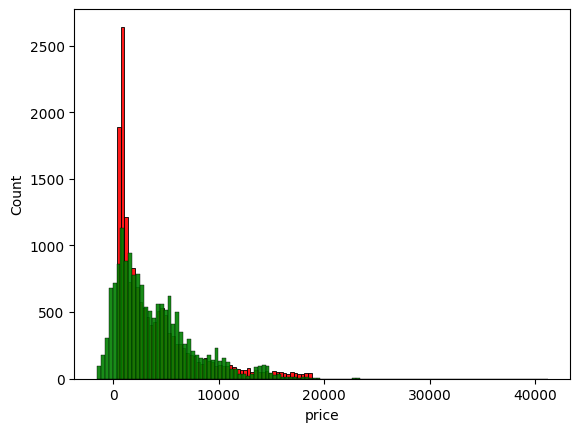

In [46]:
sns.histplot(y_test, color = 'red', alpha = 0.9)
sns.histplot(y_test_pred, color = 'green', alpha = 0.9)

#Step-7:
#Evaluation of Test Data

In [47]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 858.0282722778069
Mean Squared Error: 1664012.7167064257
Root Mean Squared Error: 1289.966168822433


#Building a Model using KNN Regressor Algorithm

In [48]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

KNeighborsRegressor()

#Predictions on Test Data

In [49]:
y_test_prediction = regressor.predict(X_test_transformed)
temp_df =pd.DataFrame({'Actual Values': y_test, 'Predicted Values':y_test_prediction})
temp_df.head()

,Actual Values,Predicted Values
11651,5055,5423.0
45310,524,773.4
6316,4027,4287.6
16789,6691,8523.0
6357,4036,3562.0


<Axes: xlabel='price', ylabel='Count'>

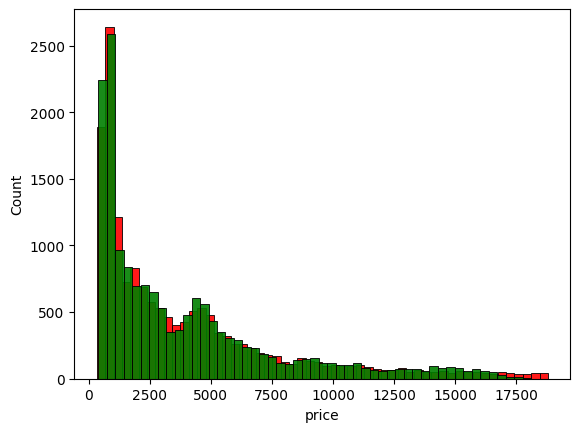

In [50]:
sns.histplot(y_test, color = 'red', alpha = 0.9)
sns.histplot(y_test_prediction, color = 'green', alpha = 0.9)

#Evaluation of Test Data

In [51]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_test_prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_prediction))
print('Root Mean Squared Error:', np.sqrt(y_test, y_test_prediction))

Mean Absolute Error: 513.7952787047337
Mean Squared Error: 896180.4475293538
Root Mean Squared Error: 11651    71.098523
45310    22.891046
6316     63.458648
16789    81.798533
6357     63.529521
           ...    
35858    30.282008
31982    27.856777
46587    42.261093
8974     67.111847
27765    25.455844
Name: price, Length: 16182, dtype: float64


#Model Building By Using Decision Tree Algorithm


In [52]:
from sklearn.tree import DecisionTreeRegressor
DT_object = DecisionTreeRegressor()
DT_object.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

#Predictions on Text Data

In [53]:
y_test_prediction = DT_object.predict(X_test_transformed)

#Creating DataFrame contains y_test and y_test_prediction values

In [54]:
temp_df = pd.DataFrame({'Actual values':y_test, 'predicted values':y_test_prediction})
temp_df.head()

,Actual values,predicted values
11651,5055,4853.0
45310,524,658.0
6316,4027,3795.0
16789,6691,7666.0
6357,4036,3338.0


#Graphical representation of Test Data

<Axes: xlabel='price', ylabel='Count'>

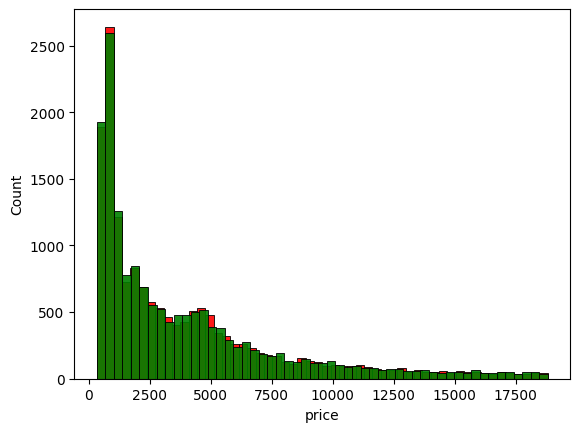

In [55]:
sns.histplot(y_test, color = 'red', alpha = 0.9)
sns.histplot(y_test_prediction, color = 'green', alpha = 0.9)

#Evaluation of Test Data

In [56]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_prediction)))

Mean Absolute Error: 594.7657994479464
Mean Squared Error: 1310732.198648361
Root Mean Squared Error: 1144.8721320079203


#Model Building by using Random Forest Algorithm

In [57]:
from sklearn.ensemble import RandomForestRegressor
RF_object = RandomForestRegressor()
RF_object.fit(X_train_transformed, y_train)

RandomForestRegressor()

#Predictions on Test Data

In [58]:
y_test_prediction = RF_object.predict(X_test_transformed)

#Creating a DataFrame consists of y_test and y_test_prediction values

In [59]:
temp_df = pd.DataFrame({'Actual values':y_test, 'predicted values':y_test_prediction})
temp_df.head()

,Actual values,predicted values
11651,5055,5484.21
45310,524,649.96
6316,4027,4224.82
16789,6691,8437.58
6357,4036,3359.05


<Axes: xlabel='price', ylabel='Count'>

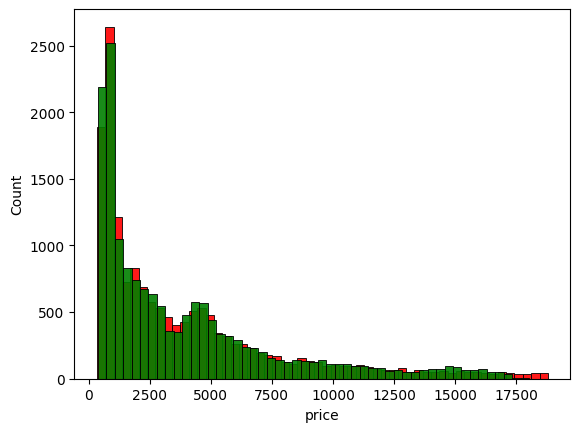

In [60]:
sns.histplot(y_test, color = 'red', alpha = 0.9)
sns.histplot(y_test_prediction, color = 'green', alpha = 0.9)

#Evaluation of Test Data

In [61]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_prediction)))

Mean Absolute Error: 454.9016679251687
Mean Squared Error: 727137.5460888856
Root Mean Squared Error: 852.723604744753
